# 5.1 핵심 개념
- 데이터 크기가 중간크기 이하, 여러 변수를 기준으로 분류하는 다소 복잡한 과제에 적합
- 레이블 범주를 선형적으로 비선형전으로 분류하는 선 혹은 초평면을 찾는 것이 핵심 과제

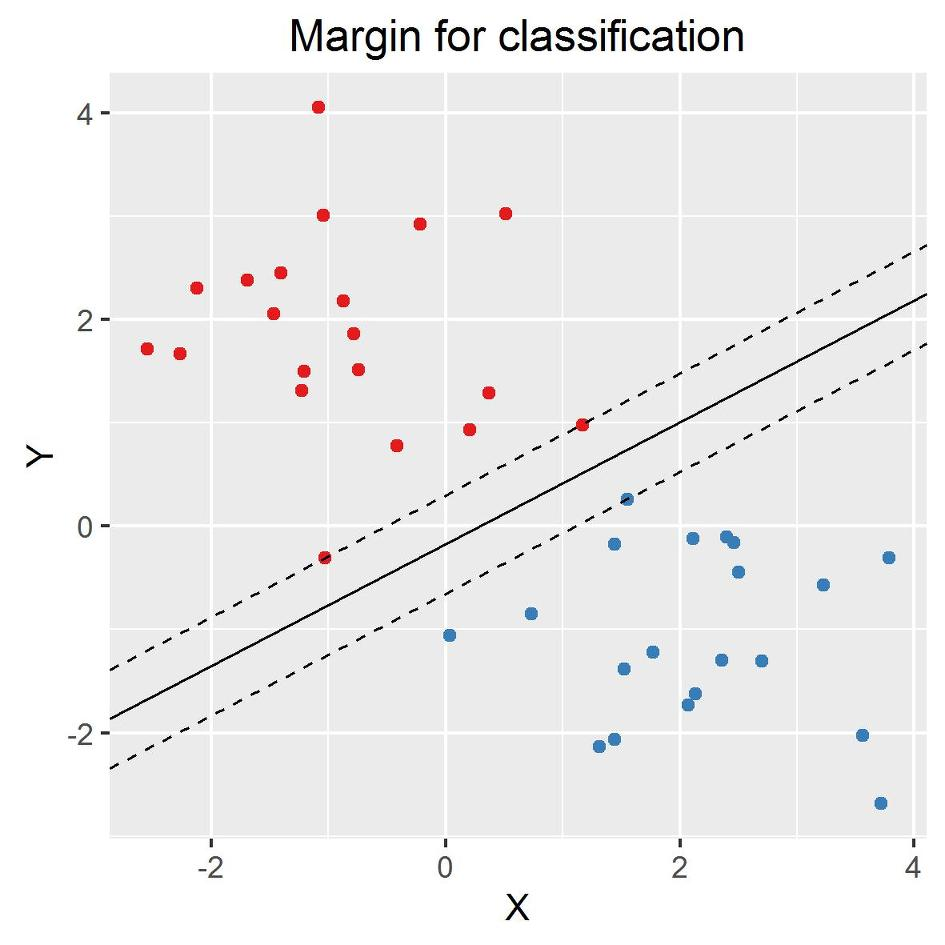
- 두 집단을 가장 멀리 떨어뜨리는 , 즉 확실하게 분리하는 선이 가장 최적의 분리
- 소프트 마진 : 잘못 분류된 데이터를 본래 속하는 카테고리로 비용을 들어 이동

# 5.3 분석 코드

## Part1. 분류

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data=pd.read_csv('../data/breast-cancer-wisconsin.csv', encoding='utf-8')

X=data[data.columns[1:-1]]
y=data[['Class']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

from sklearn.svm import SVC
model=SVC()
model.fit(X_scaled_train, y_train)

pred_train=model.predict(X_scaled_train)
print(f"TrainSet Score : {model.score(X_scaled_train, y_train)}")

pred_test=model.predict(X_scaled_test)
print(f"TestSet Score : {model.score(X_scaled_test, y_test)}")

TrainSet Score : 0.984375
TestSet Score : 0.9649122807017544


In [6]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬 : \n", confusion_train)

from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train, pred_train)
print(f"\n분류예측 레포트 : \n{cfreport_train}")

훈련데이터 오차행렬 : 
 [[329   4]
 [  4 175]]

분류예측 레포트 : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.98      0.98      0.98       179

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512



In [7]:
confusion_test=confusion_matrix(y_test, pred_test)
print("훈련데이터 오차행렬 : \n", confusion_test)

cfreport_test=classification_report(y_test, pred_test)
print(f"\n분류예측 레포트 : \n{cfreport_test}")

훈련데이터 오차행렬 : 
 [[106   5]
 [  1  59]]

분류예측 레포트 : 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       111
           1       0.92      0.98      0.95        60

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [11]:
# Grid Search
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(SVC(),
                        param_grid={"C":[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                                   'kernel':['linear', 'rbf','sigmoid'],
                                   'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
                        cv=5)
grid_search.fit(X_scaled_train, y_train)

print(f"Best Parameter : {grid_search.best_params_}")
print(f"Best Score : {grid_search.best_score_}")
print(f"TestSet Score : {grid_search.score(X_scaled_test, y_test)}")

Best Parameter : {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
Best Score : 0.9745669141442985
TestSet Score : 0.9590643274853801


In [12]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
random_search=RandomizedSearchCV(SVC(),
                                param_distributions={'C':randint(low=0.0001, high=100),
                                                    'kernel':['linear','sigmoid','rbf'],
                                                    'gamma':randint(low=0.0001, high=100)})
random_search.fit(X_scaled_train, y_train)

print(f"Best Parameter : {random_search.best_params_}")
print(f"Best Score : {random_search.best_score_}")
print(f"TestSet Score : {random_search.score(X_scaled_test, y_test)}")

Best Parameter : {'C': 25, 'gamma': 88, 'kernel': 'linear'}
Best Score : 0.9706453455168476
TestSet Score : 0.9590643274853801


## Part2. 회귀

In [17]:
data2=pd.read_csv("../data/house_price.csv", encoding='utf-8')

X=data2[data2.columns[:-1]]
y=data2[['house_value']]

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

from sklearn.svm import SVR
model=SVR(kernel='poly')
model.fit(X_scaled_train, y_train)

pred_train=model.predict(X_scaled_train)
pred_test=model.predict(X_scaled_test)
print("TrainSet Score : ", model.score(X_scaled_train, y_train) )
print("TestSet Score : ", model.score(X_scaled_test, y_test))

TrainSet Score :  0.4411532001585847
TestSet Score :  0.45698485085656304


In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error
MSE_train=mean_squared_error(y_train, pred_train)
MSE_test=mean_squared_error(y_test, pred_test)
print(f"훈련 데이터 RMSE : {np.sqrt(MSE_train):.4f}")
print(f"테스트 데이터 RMSE : {np.sqrt(MSE_test):.4f}")

훈련 데이터 RMSE : 71350.5669
테스트 데이터 RMSE : 70447.9641


In [19]:
SVR?

In [23]:
# Grid Search
grid_search=GridSearchCV(SVR(),
                        param_grid={'kernel': ['poly'],
                                   'C':[0.01,0.1,1,10,100],
                                   'gamma':[0.01,0.1,1,10,100]},
                        cv=5)
grid_search.fit(X_scaled_train,y_train)

print(f"Best Parameter : {grid_search.best_params_}")
print(f"Best Score : {grid_search.best_score_:.4f}")
print(f"TestSet Score : {grid_search.score(X_scaled_test, y_test):.4f}")

Best Parameter : {'C': 10, 'gamma': 100, 'kernel': 'poly'}
Best Score : 0.5944
TestSet Score : 0.6090


In [27]:
# Random Search
random_search=RandomizedSearchCV(SVR(),
                                 param_distributions={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                             'C':[0.01,0.1,1,10,100],
                                             'gamma':[0.01,0.1,1,10,100]},
                        cv=5,n_iter=20)
random_search.fit(X_scaled_train,y_train)

print(f"Best Parameter : {random_search.best_params_}")
print(f"Best Score : {random_search.best_score_:.4f}")
print(f"TestSet Score : {random_search.score(X_scaled_test, y_test):.4f}")

Best Parameter : {'kernel': 'poly', 'gamma': 100, 'C': 1}
Best Score : 0.5931
TestSet Score : 0.6090
